In [19]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cmap


In [20]:
def slices(array, n):
    data = []
    for i in range(0,100,n):
        slice = array[:,:, i:i+n].sum(axis=2)//n
        data.append(slice)
    return data


In [21]:
def getFileNames(fileCount):
    data = []
    for i in range(0, fileCount):
        name = "Data\\CLOUDf0" + str(i+1)+ ".bin";
        data.append(name)
    return data

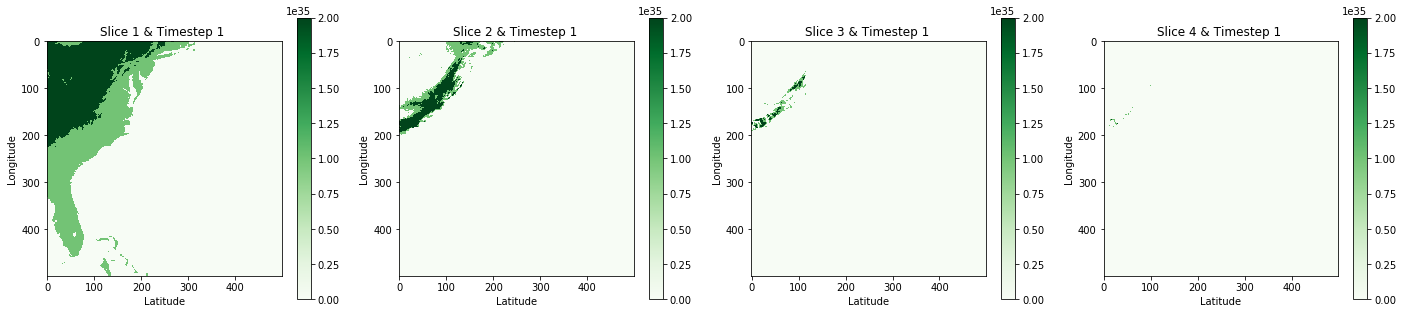

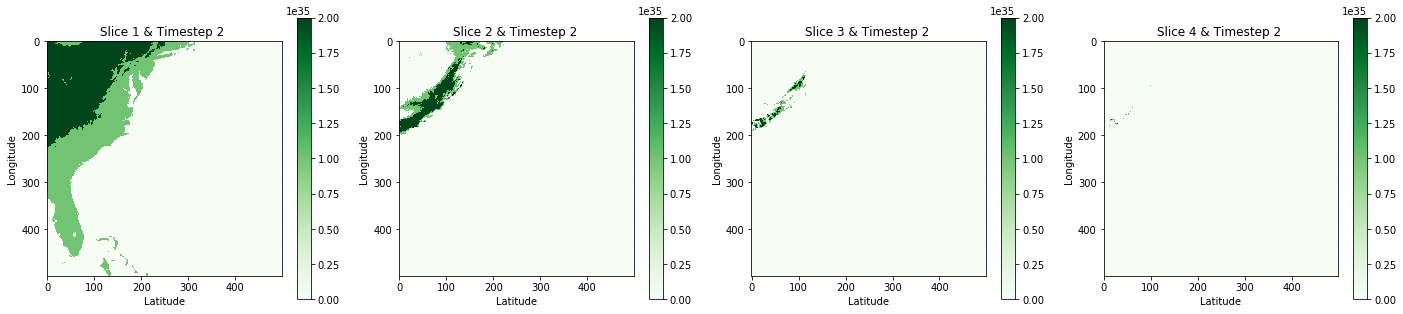

In [78]:
numFiles = 2
file = getFileNames(numFiles)
timestep = 1
n = 2
rows = 100//n

for i in file:
    with open(i, "rb") as f:
        arr = np.fromfile(f, dtype='>f')
        arr = np.reshape(arr, (500,500,100), order="F")
    data = slices(arr, n)
    fig = plt.figure(figsize=(10, 10))
    fig.subplots_adjust(bottom = 0.2, right = 2, top = 2)
    for j in range(0, 4):
        fig.add_subplot(4, 4, j+1)
        plt.imshow(data[j], cmap=cmap.Greens, vmin=data[j].min(), vmax=data[j].max())
        plt.title("Slice %s & Timestep %s "%(j+1, timestep))
        plt.xlabel("Latitude")
        plt.ylabel("Longitude")
        plt.colorbar()
    timestep += 1